#Importing the Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Import Dataset

In [ ]:
dataset = pd.read_csv('Train_Loan.csv')
#Only for this dataset
dataset['Credit_History'] = dataset['Credit_History'].astype('O')

In [ ]:
dataset.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [ ]:
#divide categorical data and numerical data

In [ ]:
num_data = []
cat_data = []
for i, c in enumerate(dataset.dtypes):
  if c == object:
    cat_data.append(dataset.iloc[:, i])
  else:
    num_data.append(dataset.iloc[:, i])

In [ ]:
len(num_data)

4

In [ ]:
len(cat_data)

9

In [ ]:
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
cat_data = pd.DataFrame(cat_data).transpose()

In [ ]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [ ]:
cat_data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,0,Semiurban,N


In [ ]:
target = []
target.append(cat_data.iloc[:, -1])

In [ ]:
target = pd.DataFrame(target).transpose()

In [ ]:
target.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [ ]:
cat_data = pd.DataFrame(cat_data).drop('Loan_Status', axis = 1)

In [ ]:
cat_data = pd.DataFrame(cat_data).drop('Loan_ID', axis = 1)

In [ ]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1,Urban
1,Male,Yes,1,Graduate,No,1,Rural
2,Male,Yes,0,Graduate,Yes,1,Urban
3,Male,Yes,0,Not Graduate,No,1,Urban
4,Male,No,0,Graduate,No,1,Urban


In [ ]:
#For specific column 'Gender'

'''df.fillna({
    'Column' : df['Column'].value_counts().index[0]
}, inplace = True)'''


cat_data.fillna({
    'Gender' : cat_data['Gender'].value_counts().index[0]
}, inplace = True)

In [ ]:
#check any missing value
cat_data['Gender'].isnull().sum().any()

False

In [ ]:
#Use backfillmethod on df
num_data.fillna(method = "bfill", inplace =True)

In [ ]:
num_data.isnull().sum().any()

False

In [ ]:
#For all columns

'''
    df.apply(Column name.operation)
#Here Lambda makesselection of all columns so unique value from value counts is calculated 
from each  colmn and filled in place where empty or NaN values are present
    '''
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
cat_data.isnull().sum().any()

False

#Encoding data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
target = pd.DataFrame(target)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
df = pd.concat([cat_data, num_data, target], axis = 1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,0
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,1
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,0
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,1
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,1
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,1


In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Credit_History       0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
0                    0
dtype: int64

#Checking imp features


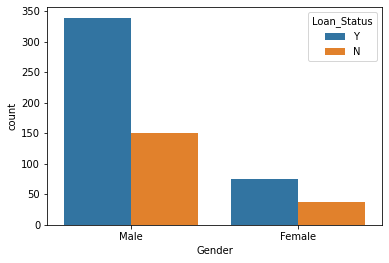

In [ ]:
sns.countplot('Gender', data = dataset, hue = 'Loan_Status')
#Important feature as Male get loan better than Female

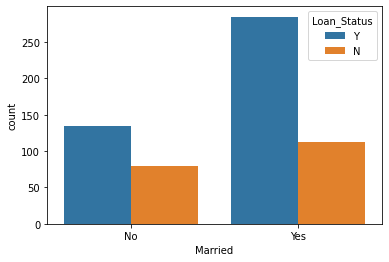

In [ ]:
sns.countplot('Married', data = dataset, hue = 'Loan_Status')
# If you are married then you can get loan with higher chances, hence imp feature

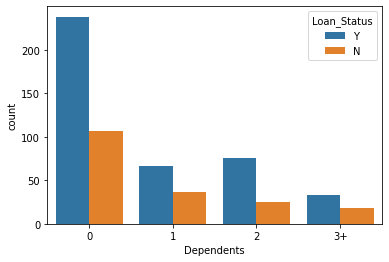

In [ ]:
sns.countplot('Dependents', data = dataset, hue = 'Loan_Status')
# 0 Dependents can give you better chances of Loan, good feature

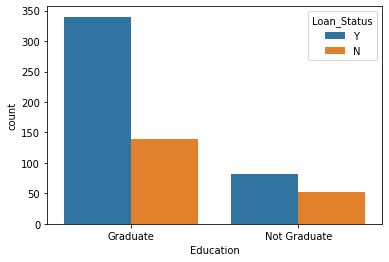

In [ ]:
sns.countplot('Education', data = dataset, hue = 'Loan_Status')

#Train Test split


In [ ]:
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Computing classification from all methods

1. Decision Tree classification


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42, max_depth=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_dtc = dtc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_dtc)
print(cm)
accuracy_score(y_test, y_dtc) 

[[18 25]
 [ 1 79]]


0.7886178861788617

2. K-nn classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_knn = knn.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_knn)
print(cm)
accuracy_score(y_test, y_knn) 

[[ 9 34]
 [13 67]]


0.6178861788617886

3. SVM Linear

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_svm = svm.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_svm)
print(cm)
accuracy_score(y_test, y_svm) 

[[ 0 43]
 [ 0 80]]


0.6504065040650406

3. Kernel SVM

In [ ]:
from sklearn.svm import SVC
svmc = SVC(kernel = 'rbf')
svmc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_svmc = svmc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_svmc)
print(cm)
accuracy_score(y_test, y_svmc)

[[ 0 43]
 [ 0 80]]


0.6504065040650406

4. Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 5, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_rfc = rfc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_rfc)
print(cm)
accuracy_score(y_test, y_rfc)

[[23 20]
 [ 6 74]]


0.7886178861788617